# Pipeline Demo
- Download Data
- Load Data

In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from pylab import rcParams

#Own packages
import download
import descriptive
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [22]:
params = {
    'outcome_col': 'ingresos_presupuestarios_neto_(mmdp)_r'
}

## Download Data

In [3]:
# download.get_files(inpc=True, fiscal_current=True, fiscal_hist=True)

## Load Data

In [4]:
fiscal_income_df = download.load_fiscal_income()

## Describing Data

In [5]:
fiscal_income_df.columns

Index(['ingresos_presupuestarios_neto_(mmdp)', 'iva_neto_(mmdp)',
       'ieps_neto_(mmdp)', 'ingresos_no_tributarios_neto_(mmdp)',
       'ingresos_tributarios_neto_(mmdp)', 'isr_neto_(mmdp)', 'inpc_2018',
       'ingresos_presupuestarios_neto_(mmdp)_r', 'iva_neto_(mmdp)_r',
       'ieps_neto_(mmdp)_r', 'ingresos_no_tributarios_neto_(mmdp)_r',
       'ingresos_tributarios_neto_(mmdp)_r', 'isr_neto_(mmdp)_r'],
      dtype='object')

In [6]:
display(fiscal_income_df.columns)
display(fiscal_income_df.shape)
display(fiscal_income_df.isnull().any())
display(fiscal_income_df.head())
display(fiscal_income_df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

Index(['ingresos_presupuestarios_neto_(mmdp)', 'iva_neto_(mmdp)',
       'ieps_neto_(mmdp)', 'ingresos_no_tributarios_neto_(mmdp)',
       'ingresos_tributarios_neto_(mmdp)', 'isr_neto_(mmdp)', 'inpc_2018',
       'ingresos_presupuestarios_neto_(mmdp)_r', 'iva_neto_(mmdp)_r',
       'ieps_neto_(mmdp)_r', 'ingresos_no_tributarios_neto_(mmdp)_r',
       'ingresos_tributarios_neto_(mmdp)_r', 'isr_neto_(mmdp)_r'],
      dtype='object')

(352, 13)

ingresos_presupuestarios_neto_(mmdp)      False
iva_neto_(mmdp)                           False
ieps_neto_(mmdp)                          False
ingresos_no_tributarios_neto_(mmdp)       False
ingresos_tributarios_neto_(mmdp)          False
isr_neto_(mmdp)                           False
inpc_2018                                 False
ingresos_presupuestarios_neto_(mmdp)_r    False
iva_neto_(mmdp)_r                         False
ieps_neto_(mmdp)_r                        False
ingresos_no_tributarios_neto_(mmdp)_r     False
ingresos_tributarios_neto_(mmdp)_r        False
isr_neto_(mmdp)_r                         False
dtype: bool

,ingresos_presupuestarios_neto_(mmdp),iva_neto_(mmdp),ieps_neto_(mmdp),ingresos_no_tributarios_neto_(mmdp),ingresos_tributarios_neto_(mmdp),isr_neto_(mmdp),inpc_2018,ingresos_presupuestarios_neto_(mmdp)_r,iva_neto_(mmdp)_r,ieps_neto_(mmdp)_r,ingresos_no_tributarios_neto_(mmdp)_r,ingresos_tributarios_neto_(mmdp)_r,isr_neto_(mmdp)_r
fecha,,,,,,,,,,,,,
1990-01-01,15.527708,2.092649,1.040445,7.923974,7.603734,3.897608,7.776037,199.686645,26.911509,13.380144,101.902469,97.784176,50.123319
1990-02-01,12.748535,1.796237,0.887693,7.192572,5.555963,2.299732,7.952120,160.316183,22.588153,11.162973,90.448486,69.867697,28.919735
1990-03-01,14.284656,2.005865,0.800115,8.635537,5.649119,2.082503,8.092310,176.521366,24.787298,9.887350,106.712880,69.808486,25.734346
1990-04-01,14.074744,2.032419,0.860166,7.489060,6.585684,3.020333,8.215472,171.319977,24.738921,10.470075,91.158005,80.161972,36.763964
1990-05-01,14.048018,2.060314,0.801122,8.258059,5.789959,2.311738,8.358838,168.061859,24.648331,9.584132,98.794346,69.267513,27.656214


,ingresos_presupuestarios_neto_(mmdp),iva_neto_(mmdp),ieps_neto_(mmdp),ingresos_no_tributarios_neto_(mmdp),ingresos_tributarios_neto_(mmdp),isr_neto_(mmdp),inpc_2018,ingresos_presupuestarios_neto_(mmdp)_r,iva_neto_(mmdp)_r,ieps_neto_(mmdp)_r,ingresos_no_tributarios_neto_(mmdp)_r,ingresos_tributarios_neto_(mmdp)_r,isr_neto_(mmdp)_r
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,178.691439,28.908804,6.712550,93.515994,85.175445,44.842295,54.510719,283.666719,44.197229,11.670799,151.740500,131.926219,66.954896
std,137.825704,23.164949,12.215370,73.426901,74.267992,42.370611,27.997773,102.619119,19.035441,14.151510,64.252570,57.436090,36.176763
min,12.748535,1.796237,-40.485066,7.192572,5.555963,2.082503,7.776037,149.787417,16.586130,-61.322528,62.650951,57.239532,21.065774
25%,56.511095,7.427295,1.064180,30.375018,23.550126,10.685149,30.906083,192.201605,26.311380,4.537521,101.737239,91.945581,40.437809
50%,148.864590,23.701243,3.107447,84.446537,63.949478,29.094310,57.062979,264.424829,42.419467,11.675109,140.863604,113.727126,54.269572
75%,284.114700,44.888799,9.342124,145.851404,110.857582,65.551319,77.857744,359.539367,57.471790,18.802166,182.030971,150.297971,82.830774
85%,327.256770,56.353127,15.589635,167.968401,171.519263,89.724418,86.835034,385.144537,65.890009,25.381355,207.307108,199.787339,104.484248
95%,425.787903,74.426980,32.852311,194.225448,246.993549,129.757645,97.146876,440.036807,77.590947,34.871140,263.999162,259.309626,136.804844
99%,514.036232,83.434382,38.734505,331.003160,288.273418,173.803202,103.048910,595.036297,88.611367,43.048384,412.275742,299.058341,187.785446


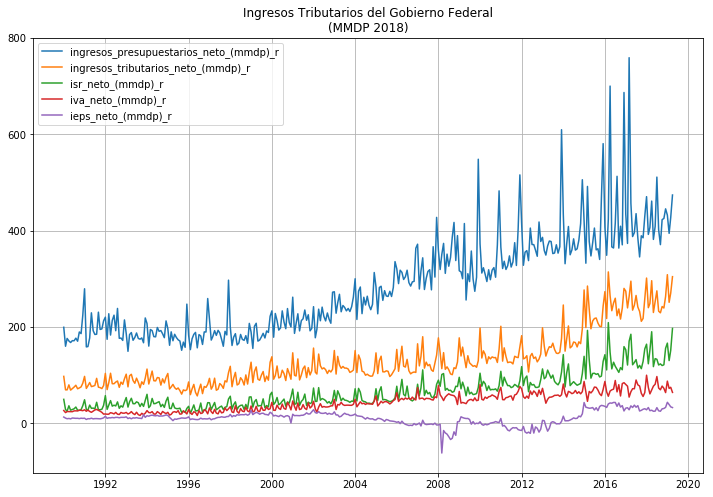

In [43]:
to_plot = ['ingresos_presupuestarios_neto_(mmdp)_r', 'ingresos_tributarios_neto_(mmdp)_r', 'isr_neto_(mmdp)_r',
           'iva_neto_(mmdp)_r', 'ieps_neto_(mmdp)_r']
descriptive.plot_series(fiscal_income_df, to_plot, 'Ingresos Tributarios del Gobierno Federal', 
                        '(MMDP 2018)')

## Decomposition

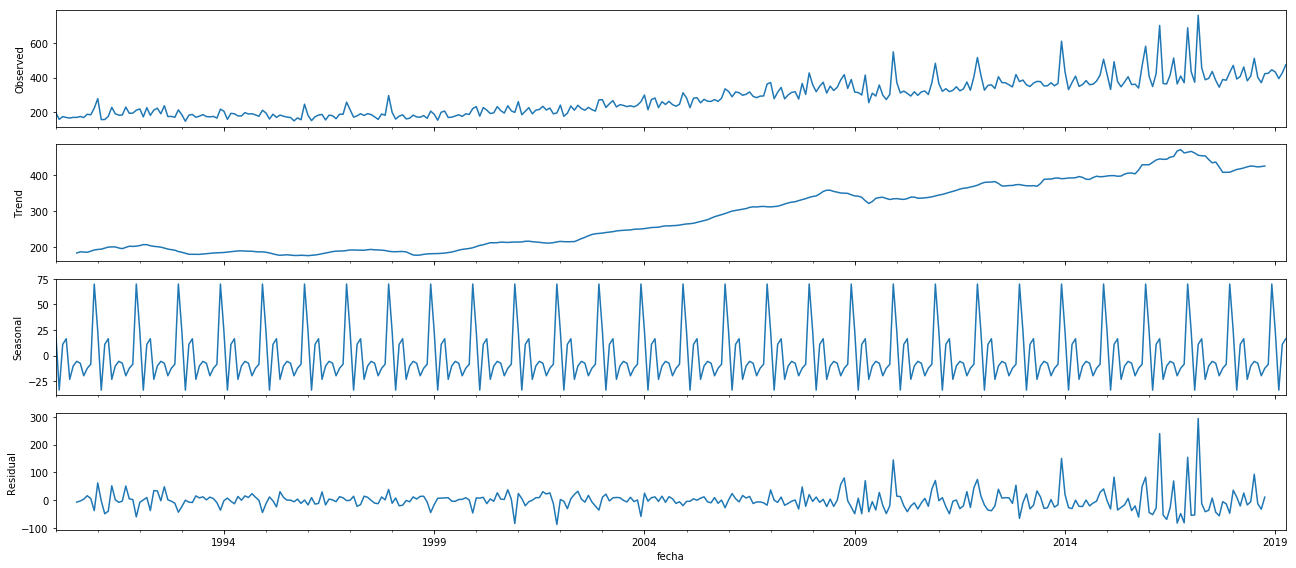

statsmodels.tsa.seasonal.DecomposeResult

In [86]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fiscal_income_df[params['outcome_col']], model='additive')
fig = decomposition.plot()
plt.show()
type(decomposition)

Se ve tendencia positiva en ingresos tributarios y estacionalidad. 

# Estacionalidad

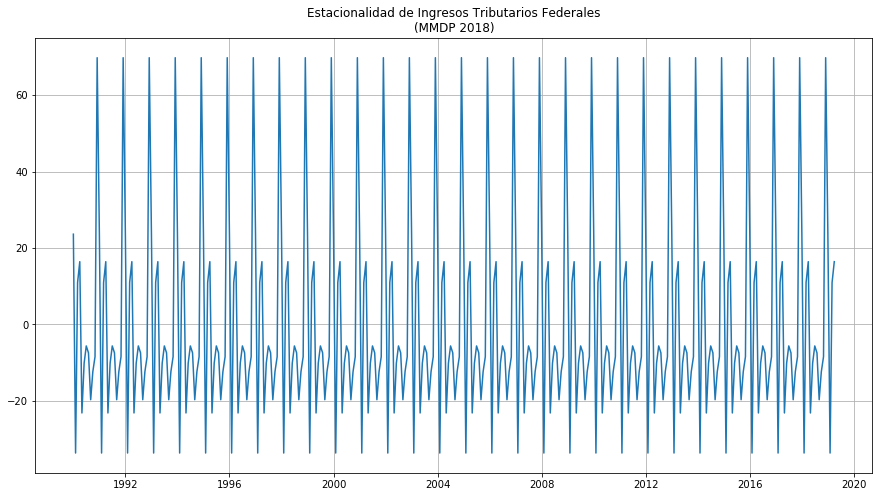

In [87]:
descriptive.plot_series(decomposition.seasonal, title='Estacionalidad de Ingresos Tributarios Federales', 
                        subtitle='(MMDP 2018)', figsize=(15, 8), legend=False)

Se ve tendencia positiva de ingresos fiscales, así como fuerte componente estacional,

## Testing for stationarity and transforming

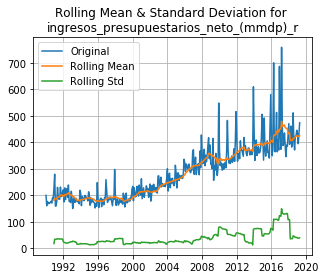

Results of Dickey-Fuller Test:
Test Statistic                   0.158360
p-value                          0.969827
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64


In [44]:
descriptive.test_stationarity(fiscal_income_df, params['outcome_col'])


 
 TRANSFORMATION log 



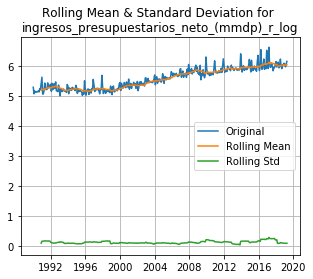

Results of Dickey-Fuller Test:
Test Statistic                   0.001135
p-value                          0.958626
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64

 
 TRANSFORMATION diff 



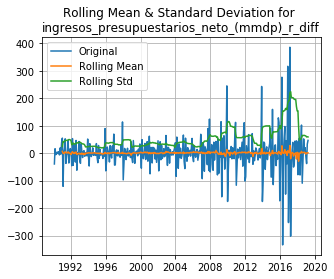

Results of Dickey-Fuller Test:
Test Statistic                -9.062754e+00
p-value                        4.516638e-15
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64

 
 TRANSFORMATION log_diff 



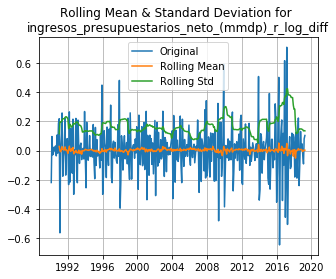

Results of Dickey-Fuller Test:
Test Statistic                -8.138028e+00
p-value                        1.046331e-12
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64


In [45]:
transforms = ['log', 'diff', 'log_diff']
for t in transforms:
    print('\n \n TRANSFORMATION {} \n'.format(t))
    new_serie_name = params['outcome_col'] + '_' + t
    fiscal_income_df[new_serie_name] = descriptive.transformation(fiscal_income_df, params['outcome_col'], t)
    descriptive.test_stationarity(fiscal_income_df, new_serie_name)

## Stationarity results
- level: Not stationary
- log: Not stationary
- diff: Stationary
- log_diff: Stationary

Vamos a usar log diff para el análisis

In [88]:
params['outcome_transformed'] = params['outcome_col'] + '_' + 'log_diff'

# ARIMA